In [1]:
import numpy as np
import serial
import time
import datetime
from PortCom import *
%matplotlib inline

## Déclaration Port Com

In [2]:
ser = serial.Serial()
ser.baudrate = 9600
ser.port = 15# Cable USB UART
#ser.port = 13# Module bluetooth
ser

Serial<id=0x14d8e358, open=False>(port='COM16', baudrate=9600, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, dsrdtr=False)

## Ouverture du Port Com

In [3]:
try:
    ser.open()
    print "Connected to %s" % ser.port
except :
    print "Error openning the port!"
    exit

Error openning the port!


## Asservissement

In [5]:
VtsM="VtsM 500 500 \n"

### Fonction de tracé temporel :

In [6]:
#tps0,y_p0=plotInfoTimeContinu(10,tps=list(), y_p=list())
#plt.scatter(tps0,y_p0)

In [ ]:
y_p.append(readFloat(ser,Requet,nbTest=nbTest))
		tpsNow=whatTime()-tpsInit + tpsBefore
		tps.append(tpsNow)
		time.sleep(dt)
	if TracePlot:
		plt.scatter(tps,y_p)
		display.clear_output()#wait=True)
		display.display(plt.gcf())

In [6]:
ser.write(VtsM)
tps0,y_p0=plotInfoTime(ser, "V1R?", 10,tps=list(), y_p=list())
ser.write("VtsM 0 0 \n")
tps0,y_p0=plotInfoTime(ser, "V1R?", 10,tps=tps0,y_p=y_p0)
plt.scatter(tps0,y_p0)

SerialException: Attempting to use a port that is not open

### Modification des parametres d'asservissement

In [19]:
Te = 0.004# Période d'échantillonnage
KvPure=40.0#Gain du correction de vitesse pour une action proportionnelle pure.
KvPID=15.0# Gain du correction de vitesse pour une action PI ou PID.
Tiv = 0.1 # Constante de temps de l'action intégrale du correction de vitesse.
Tdv = 1.0 # Constante de temps de l'action dérivé du correction de vitesse.
Av  = 1.0 # Av
KpD = 1.0 # Gain du correction de position sur la vitesse de déplacement
KpA = 0.1 # Gain du correction de position sur la vitesse angulaire
Tip = 1.0 # Constante de temps de l'action intégrale du correction de position.
Tdp = 1.0 # Constante de temps de l'action dérivé du correction de position.
Ap  = 1.0 #
cor_type_v = 1 # Type de correcteur pour le correction de vitesse.
# 0=>P (fonctionnel)# 1=>PI (fonctionnel)# 2=>PID (non fonctionnel)
corr_type_p = 0 # Type de correcteur pour le correction de position.
# 0=>P (fonctionnel)# 1=>PI (non fonctionnel)# 2=>PID (non fonctionnel)
Seuil = 50.0 # Valeur max de l'erreur de vitesse après la-quel le correcteur de vitesse ne prend plus en compte l'action intégrale et/ou dérivé.
Acceleration =5.0 # Valeur de l'accélération
Rayon_Roue = 38.0 # Rayon de la roue
Distance_Roue = 256.0 # Distance entre les roues du robot
Rapport_Reduction =28.8 # Rapport de réduction total entre le moteur et la roue.
Nb_imp = 500.0 # Nombre d'impulsion du capteur incrémental par tour moteur.

In [23]:
String="Asserv\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s \n" % (Te, KvPure, KvPID, Tiv, Tdv, Av, KpD, KpA, Tip, Tdp, Ap, cor_type_v,
corr_type_p, Seuil, 10.0, Rayon_Roue, Distance_Roue, Rapport_Reduction, Nb_imp)
print String
ser.write(String)

Asserv	0.004	40.0	15.0	0.1	1.0	1.0	1.0	0.1	1.0	1.0	1.0	1	0	50.0	10.0	38.0	256.0	28.8	500.0 



92L

In [24]:
ser.write(VtsM)
tps1,y_p1=plotInfoTime("V1R?", 1,tps=list(), y_p=list())
ser.write("VtsM 0 0 \n")
tps1,y_p1=plotInfoTime("V1R?", 1,tps=tps1,y_p=y_p1)

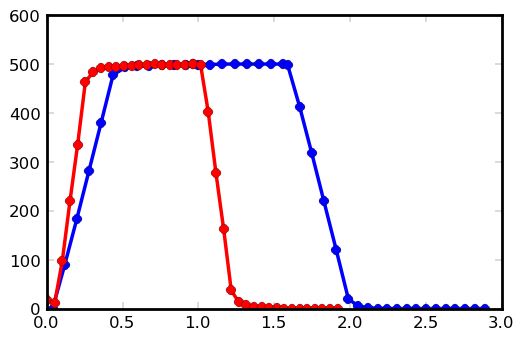

In [25]:
plt.plot(tps0,y_p0,'-ob')
plt.plot(tps1,y_p1,'-or')